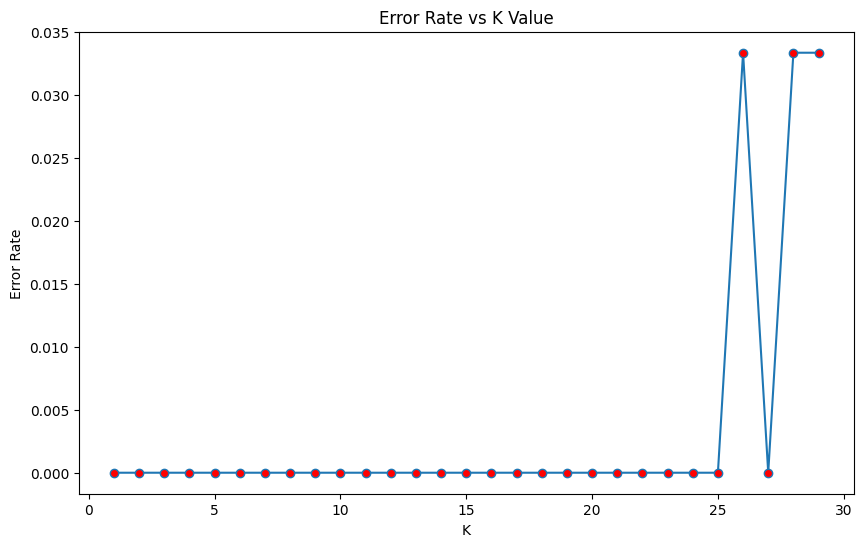

IRIS Dataset Results:
Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



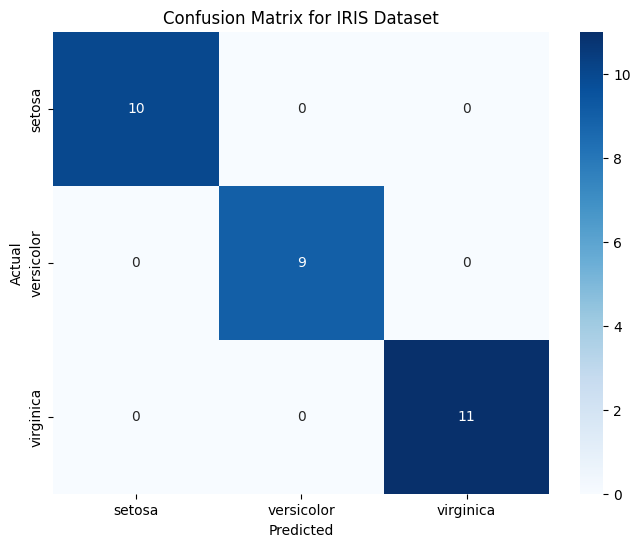

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

iris_df = pd.read_csv('iris.csv')

X = iris_df.drop('species', axis=1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

error_rates = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rates, marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

optimal_k = 3

knn_iris = KNeighborsClassifier(n_neighbors=optimal_k)
knn_iris.fit(X_train_scaled, y_train)

y_pred = knn_iris.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("IRIS Dataset Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_iris.classes_, yticklabels=knn_iris.classes_)
plt.title('Confusion Matrix for IRIS Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

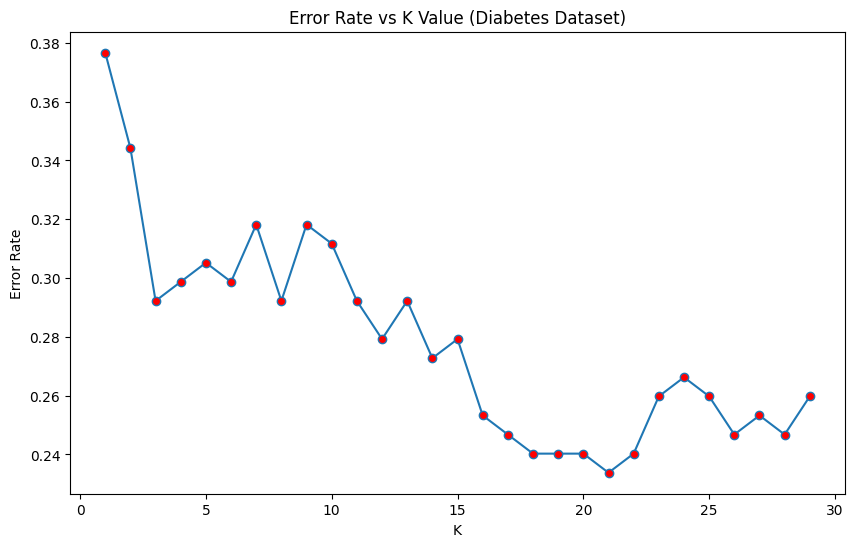


Diabetes Dataset Results:
Accuracy: 0.6818

Confusion Matrix:
[[76 23]
 [26 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



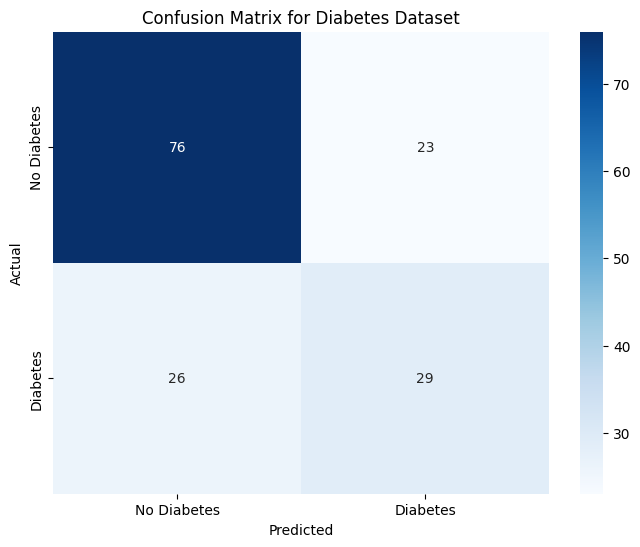

In [11]:
diabetes_df = pd.read_csv('diabetes.csv')

X_dia = diabetes_df.drop('Outcome', axis=1)
y_dia = diabetes_df['Outcome']

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(
    X_dia, y_dia, test_size=0.2, random_state=42)

scaler_dia = StandardScaler()
X_train_dia_scaled = scaler_dia.fit_transform(X_train_dia)
X_test_dia_scaled = scaler_dia.transform(X_test_dia)

error_rates_dia = []
for k in range(1, 30):
    knn_dia = KNeighborsClassifier(n_neighbors=k)
    knn_dia.fit(X_train_dia_scaled, y_train_dia)
    pred_dia = knn_dia.predict(X_test_dia_scaled)
    error_rates_dia.append(1 - accuracy_score(y_test_dia, pred_dia))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rates_dia, marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value (Diabetes Dataset)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

optimal_k_dia = 9

knn_diabetes = KNeighborsClassifier(n_neighbors=optimal_k_dia)
knn_diabetes.fit(X_train_dia_scaled, y_train_dia)

y_pred_dia = knn_diabetes.predict(X_test_dia_scaled)

accuracy_dia = accuracy_score(y_test_dia, y_pred_dia)
conf_matrix_dia = confusion_matrix(y_test_dia, y_pred_dia)
class_report_dia = classification_report(y_test_dia, y_pred_dia)

print("\nDiabetes Dataset Results:")
print(f"Accuracy: {accuracy_dia:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dia)
print("\nClassification Report:")
print(class_report_dia)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_dia, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Diabetes Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

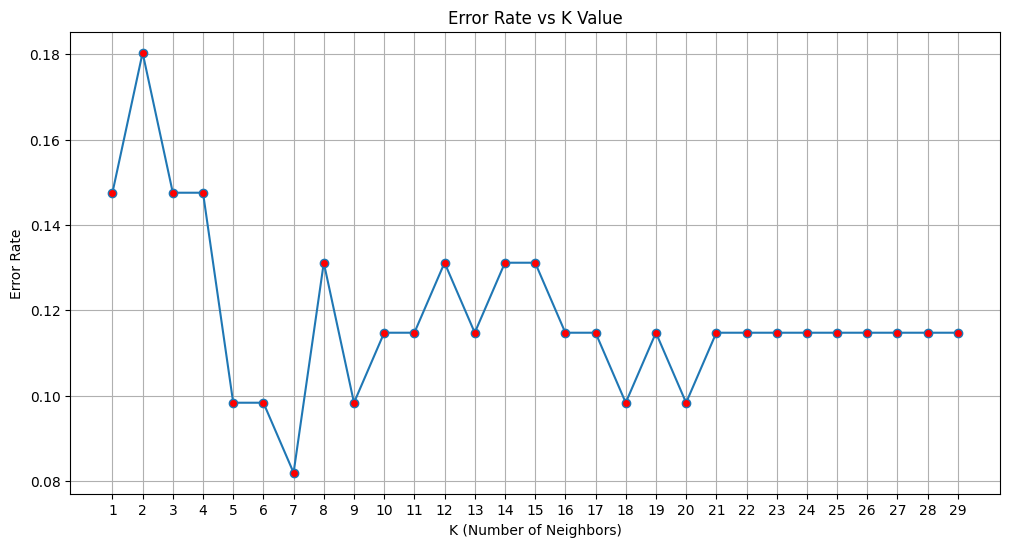

Optimal K value: 7

Accuracy with K=7: 0.9180


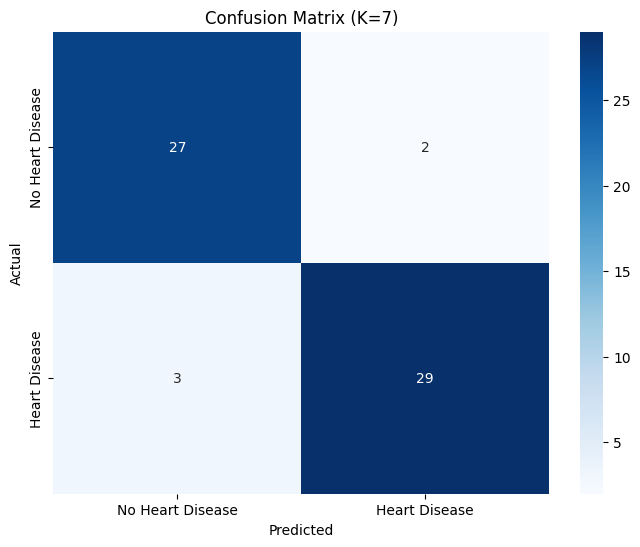


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



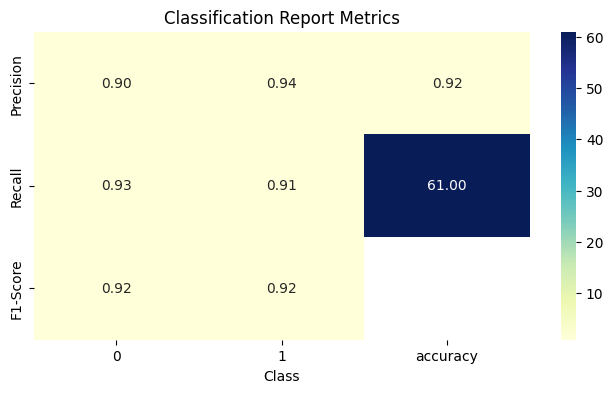

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

heart_df = pd.read_csv('heart.csv')

X = heart_df.drop('target', axis=1)
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

error_rates = []
k_values = range(1, 30)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, pred))

plt.figure(figsize=(12, 6))
plt.plot(k_values, error_rates, marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = error_rates.index(min(error_rates)) + 1  # +1 because index starts at 0
print(f"Optimal K value: {optimal_k}")

knn_heart = KNeighborsClassifier(n_neighbors=optimal_k)
knn_heart.fit(X_train_scaled, y_train)

y_pred = knn_heart.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with K={optimal_k}: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

report_data = []
lines = class_report.split('\n')
for line in lines[2:-3]:
    row_data = line.strip().split()
    if len(row_data) > 0:
        report_data.append(row_data)

report_df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
report_df = report_df.set_index('Class')

plt.figure(figsize=(8, 4))
sns.heatmap(report_df[['Precision', 'Recall', 'F1-Score']].astype(float).T,
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()